In [1]:
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load dataset
data_amazon_phone = pd.read_csv('/content/drive/My Drive/amazon-cell-phone-reviews.csv')

In [4]:
data_amazon_phone.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


# Data Preprocessing

In [5]:
# Remove unnecessary columns and handle missing values if any
data_amazon_phone = data_amazon_phone[['rating', 'title', 'body']].dropna()

# Combine title and body for analysis
data_amazon_phone['text'] = data_amazon_phone['title'] + " " + data_amazon_phone['body']

In [6]:
data_amazon_phone.head()

,rating,title,body,text
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ..."
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon..."
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a..."
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T..."


In [7]:
# Label encoding for sentiment (positive, neutral, negative)
def sentiment_label(rating):
    if rating > 3:
        return 'positive'
    else:
        return 'negative'

data_amazon_phone['sentiment'] = data_amazon_phone['rating'].apply(sentiment_label)

In [8]:
data_amazon_phone.head()

,rating,title,body,text,sentiment
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ...",negative
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...,negative
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon...",positive
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a...",negative
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T...",positive


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Text preprocessing
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

data_amazon_phone['clean_text'] = data_amazon_phone['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


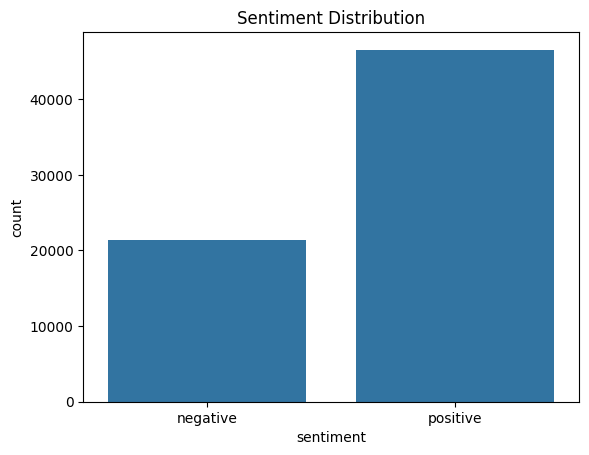

In [10]:
import seaborn as sns_amazon
import matplotlib.pyplot as plt_amazon
# Plot the distribution of sentiments
sns_amazon.countplot(x='sentiment', data=data_amazon_phone)
plt_amazon.title('Sentiment Distribution')
plt_amazon.show()

In [11]:
from nltk.stem import PorterStemmer
import re

# Initialize stemmer
stemmer = PorterStemmer()

# Extended text preprocessing function
def preprocess_text_extended(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Keep only alphanumeric characters and whitespace [[1](https://stackoverflow.com/questions/15547409/how-to-get-rid-of-punctuation-using-nltk-tokenizer)]

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords and short words, apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]

    return ' '.join(words)

# Apply extended preprocessing
data_amazon_phone['clean_text'] = data_amazon_phone['text'].apply(preprocess_text_extended)

In [12]:
data_amazon_phone.head()

,rating,title,body,text,sentiment,clean_text
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ...",negative,def best worst samsung a600 awhil absolut doo ...
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...,negative,text messag doesnt work due softwar issu nokia...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon...",positive,love phone great reliabl phone also purchas ph...
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a...",negative,love phone love phone realli need one didnt ex...
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T...",positive,great phone servic option lousi case phone gre...


In [13]:
# Filter the dataset by class label
positive_reviews = data_amazon_phone[data_amazon_phone['sentiment'] == 'positive'].sample(n=10000, random_state=42)
negative_reviews = data_amazon_phone[data_amazon_phone['sentiment'] == 'negative'].sample(n=10000, random_state=42)

# Combine the sampled data into a new balanced dataset
balanced_data = pd.concat([positive_reviews, negative_reviews])

# Shuffle the dataset to mix positive and negative reviews
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced dataset
print(balanced_data['sentiment'].value_counts())
balanced_data.head()

sentiment
negative    10000
positive    10000
Name: count, dtype: int64


,rating,title,body,text,sentiment,clean_text
0,2,Two Stars,The back cover is small and phone is terribly ...,Two Stars The back cover is small and phone is...,negative,two star back cover small phone terribl slow
1,5,Excelentemente excelente,Excelente,Excelentemente excelente Excelente,positive,excelentement excelent excelent
2,5,Five Stars,very good ph,Five Stars very good ph,positive,five star good
3,4,Low Battery life,"I really like this phone, but the battery life...","Low Battery life I really like this phone, but...",positive,low batteri life realli like phone batteri lif...
4,1,No 4G data in US,Great phone BUT I often only get 2G data speed...,No 4G data in US Great phone BUT I often only ...,negative,data great phone often get data speed read see...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset

# Transform the clean_text column
X = tfidf.fit_transform(balanced_data['clean_text']).toarray()

# Target variable
y = balanced_data['sentiment']


In [15]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
